In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
# read dataset
df = pd.read_csv("Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
# remove not important columns
df = df.drop(["No", "X1 transaction date"],axis=1)

In [6]:
# nearst to stores
df["X4 number of convenience stores"].value_counts()

X4 number of convenience stores
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: count, dtype: int64

In [7]:
# zarib hambastegi:
corr_matrix = df.corr()
corr_matrix["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

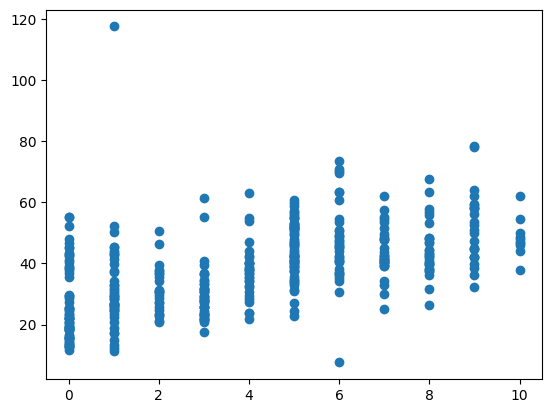

In [8]:
plt.scatter(df["X4 number of convenience stores"],df["Y house price of unit area"])

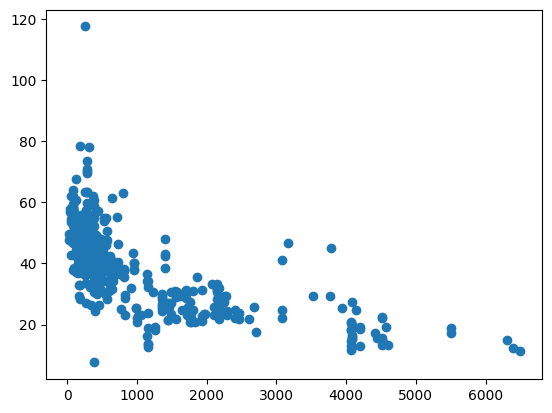

In [9]:
plt.scatter(df["X3 distance to the nearest MRT station"],df["Y house price of unit area"])

In [10]:
train,test = train_test_split(df,test_size=0.2,random_state=42)
 

In [11]:
y_train = train["Y house price of unit area"]
x_train = train.drop("Y house price of unit area",axis=1)

In [12]:
# ijad chand columns:
def add_clomns(dataset):
    dataset["X7 long_lat"] = dataset["X6 longitude"]/dataset["X5 latitude"]
    dataset["X8 MRT_store"] = dataset["X3 distance to the nearest MRT station"]/dataset["X4 number of convenience stores"]
    dataset["X9 house_store"] = dataset["X2 house age"]/dataset["X4 number of convenience stores"]
    return dataset


In [13]:
x_train = add_clomns(dataset=x_train)

In [14]:
x_train

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,X7 long_lat,X8 MRT_store,X9 house_store
192,43.8,57.58945,7,24.96750,121.54069,4.867956,8.227064,6.257143
234,8.0,2216.61200,4,24.96007,121.51361,4.868320,554.153000,2.000000
5,7.1,2175.03000,3,24.96305,121.51254,4.867696,725.010000,2.366667
45,36.6,488.81930,8,24.97015,121.54494,4.867610,61.102412,4.575000
245,7.5,639.61980,5,24.97258,121.54814,4.867264,127.923960,1.500000
...,...,...,...,...,...,...,...,...
71,35.5,640.73910,3,24.97563,121.53715,4.866230,213.579700,11.833333
106,17.2,189.51810,8,24.97707,121.54308,4.866186,23.689763,2.150000
270,10.8,252.58220,1,24.97460,121.53046,4.866162,252.582200,10.800000
348,4.6,259.66070,6,24.97585,121.54516,4.866507,43.276783,0.766667


In [15]:
# baraye hamin inf , sefr darim
0 in df["X4 number of convenience stores"]

True

In [16]:
x_train.describe()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,X7 long_lat,X8 MRT_store,X9 house_store
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,326.000000
mean,17.288822,1059.603962,4.145015,24.969333,121.533885,4.867327,inf,inf
std,11.327281,1217.929569,2.953703,0.012484,0.014976,0.002265,NaN,NaN
min,0.000000,23.382840,0.000000,24.932070,121.475160,4.857891,3.340406,0.000000
25%,8.450000,289.324800,1.000000,24.963010,121.529665,4.865737,48.832967,1.967857
50%,15.900000,492.231300,4.000000,24.971100,121.539170,4.866966,128.121420,4.387500
75%,27.200000,1442.932500,6.000000,24.978260,121.543480,4.868317,863.197000,11.950000
max,43.800000,6306.153000,10.000000,25.014590,121.566270,4.873882,inf,inf


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 192 to 102
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            331 non-null    float64
 1   X3 distance to the nearest MRT station  331 non-null    float64
 2   X4 number of convenience stores         331 non-null    int64  
 3   X5 latitude                             331 non-null    float64
 4   X6 longitude                            331 non-null    float64
 5   X7 long_lat                             331 non-null    float64
 6   X8 MRT_store                            331 non-null    float64
 7   X9 house_store                          326 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.3 KB


In [18]:
#sort index:
x_train["X9 house_store"].index = list(range(331))
x_train["X9 house_store"]

0       6.257143
1       2.000000
2       2.366667
3       4.575000
4       1.500000
         ...    
326    11.833333
327     2.150000
328    10.800000
329     0.766667
330     0.183333
Name: X9 house_store, Length: 331, dtype: float64

In [19]:
# fill inf
for i in range(331):
    if x_train["X9 house_store"][i] == np.inf:
        x_train["X9 house_store"][i] = max(x_train["X2 house age"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1680679220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["X9 house_store"][i] = max(x_train["X2 house age"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1680679220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["X9 house_store"][i] = max(x_train["X2 house age"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1680679220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 192 to 102
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            331 non-null    float64
 1   X3 distance to the nearest MRT station  331 non-null    float64
 2   X4 number of convenience stores         331 non-null    int64  
 3   X5 latitude                             331 non-null    float64
 4   X6 longitude                            331 non-null    float64
 5   X7 long_lat                             331 non-null    float64
 6   X8 MRT_store                            331 non-null    float64
 7   X9 house_store                          326 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.3 KB


In [21]:
x_train.describe()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,X7 long_lat,X8 MRT_store,X9 house_store
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,326.000000
mean,17.288822,1059.603962,4.145015,24.969333,121.533885,4.867327,inf,11.384981
std,11.327281,1217.929569,2.953703,0.012484,0.014976,0.002265,NaN,15.181334
min,0.000000,23.382840,0.000000,24.932070,121.475160,4.857891,3.340406,0.000000
25%,8.450000,289.324800,1.000000,24.963010,121.529665,4.865737,48.832967,1.967857
50%,15.900000,492.231300,4.000000,24.971100,121.539170,4.866966,128.121420,4.387500
75%,27.200000,1442.932500,6.000000,24.978260,121.543480,4.868317,863.197000,11.950000
max,43.800000,6306.153000,10.000000,25.014590,121.566270,4.873882,inf,43.800000


In [22]:
# fill inf:
x_train["X8 MRT_store"].index = list(range(331))
for i in range(331):
    if np.inf == x_train["X8 MRT_store"][i]:
        x_train["X8 MRT_store"][i] = max(x_train["X3 distance to the nearest MRT station"])
        

C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\3788850750.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train["X8 MRT_store"][i] = max(x_train["X3 distance to the nearest MRT station"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15

In [23]:
# drop nan:
x_train = x_train.dropna()

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 192 to 102
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            326 non-null    float64
 1   X3 distance to the nearest MRT station  326 non-null    float64
 2   X4 number of convenience stores         326 non-null    int64  
 3   X5 latitude                             326 non-null    float64
 4   X6 longitude                            326 non-null    float64
 5   X7 long_lat                             326 non-null    float64
 6   X8 MRT_store                            326 non-null    float64
 7   X9 house_store                          326 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 22.9 KB


In [25]:
x_train.describe()
x_train["Y Price"] = y_train

C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1525690163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Y Price"] = y_train


In [26]:
# normalize
from sklearn.preprocessing import normalize
X = normalize(x_train.values)


In [27]:
x_train = pd.DataFrame(X,columns=x_train.columns)

In [28]:
# zarib hambastegi:
corr_matrix = x_train.corr()
corr_matrix["Y Price"].sort_values(ascending=False)

Y Price                                   1.000000
X5 latitude                               0.960670
X6 longitude                              0.960663
X7 long_lat                               0.960655
X4 number of convenience stores           0.913833
X2 house age                              0.510690
X9 house_store                            0.180829
X3 distance to the nearest MRT station   -0.019572
X8 MRT_store                             -0.623603
Name: Y Price, dtype: float64

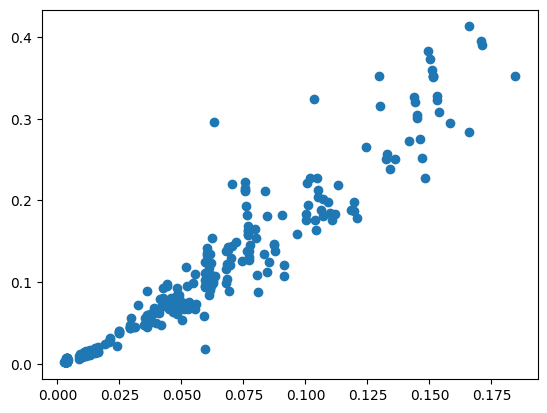

In [29]:
plt.scatter(x_train["X5 latitude"],x_train["Y Price"])

In [30]:
# hala test ro dorost kon:
y_test = test["Y house price of unit area"]
x_test = test.drop("Y house price of unit area",axis=1)


In [31]:
x_test = add_clomns(x_test)

In [32]:
x_test

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,X7 long_lat,X8 MRT_store,X9 house_store
358,1.1,193.5845,6,24.96571,121.54089,4.868313,32.264083,0.183333
350,13.2,492.2313,5,24.96515,121.53737,4.868281,98.446260,2.640000
373,0.0,274.0144,1,24.97480,121.53059,4.866129,274.014400,0.000000
399,12.7,170.1289,1,24.97371,121.52984,4.866311,170.128900,12.700000
369,20.2,2185.1280,3,24.96322,121.51237,4.867656,728.376000,6.733333
...,...,...,...,...,...,...,...,...
31,29.6,769.4034,7,24.98281,121.53408,4.864708,109.914771,4.228571
283,33.5,1978.6710,2,24.98674,121.51844,4.863317,989.335500,16.750000
157,16.1,815.9314,4,24.97886,121.53464,4.865500,203.982850,4.025000
203,15.6,289.3248,5,24.98203,121.54348,4.865236,57.864960,3.120000


In [33]:
x_test.describe()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,X7 long_lat,X8 MRT_store,X9 house_store
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,19.402410,1180.720047,3.891566,24.967821,121.531270,4.867517,inf,inf
std,11.563652,1428.782855,2.921794,0.012109,0.016679,0.002126,NaN,NaN
min,0.000000,23.382840,0.000000,24.938850,121.473530,4.863317,3.340406,0.000000
25%,12.750000,289.324800,1.000000,24.963020,121.517960,4.865927,54.348429,2.541667
50%,16.200000,492.231300,4.000000,24.970050,121.537430,4.866969,187.482300,5.325000
75%,30.400000,1571.774500,6.000000,24.976810,121.542645,4.868425,896.106500,14.175000
max,41.400000,6488.021000,10.000000,24.986740,121.561740,4.872070,inf,inf


In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 358 to 208
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            83 non-null     float64
 1   X3 distance to the nearest MRT station  83 non-null     float64
 2   X4 number of convenience stores         83 non-null     int64  
 3   X5 latitude                             83 non-null     float64
 4   X6 longitude                            83 non-null     float64
 5   X7 long_lat                             83 non-null     float64
 6   X8 MRT_store                            83 non-null     float64
 7   X9 house_store                          83 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 5.8 KB


In [35]:
# sort index:
x_test["X9 house_store"].index = list(range(83))
x_test["X9 house_store"]

0      0.183333
1      2.640000
2      0.000000
3     12.700000
4      6.733333
        ...    
78     4.228571
79    16.750000
80     4.025000
81     3.120000
82    11.500000
Name: X9 house_store, Length: 83, dtype: float64

In [36]:
# fill inf:
for i in range(83):
    if x_test["X9 house_store"][i] == np.inf:
        x_test["X9 house_store"][i] = max(x_test["X2 house age"])


C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1332737398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["X9 house_store"][i] = max(x_test["X2 house age"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1332737398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["X9 house_store"][i] = max(x_test["X2 house age"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\1332737398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [37]:
x_test["X8 MRT_store"].index = list(range(83))
for i in range(83):
    if np.inf == x_test["X8 MRT_store"][i]:
        x_test["X8 MRT_store"][i] = max(x_test["X3 distance to the nearest MRT station"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_15556\3197119668.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test["X8 MRT_store"][i] = max(x_test["X3 distance to the nearest MRT station"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_1555

In [38]:
x_test = x_test.dropna()

In [39]:
x_test["Y Price"] = y_test

In [40]:
X = normalize(x_test)
x_test = pd.DataFrame(x_test,columns=x_test.columns)

In [41]:
x_test

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,X7 long_lat,X8 MRT_store,X9 house_store,Y Price
358,1.1,193.5845,6,24.96571,121.54089,4.868313,32.264083,0.183333,45.1
350,13.2,492.2313,5,24.96515,121.53737,4.868281,98.446260,2.640000,42.3
373,0.0,274.0144,1,24.97480,121.53059,4.866129,274.014400,0.000000,52.2
399,12.7,170.1289,1,24.97371,121.52984,4.866311,170.128900,12.700000,37.3
369,20.2,2185.1280,3,24.96322,121.51237,4.867656,728.376000,6.733333,22.8
...,...,...,...,...,...,...,...,...,...
31,29.6,769.4034,7,24.98281,121.53408,4.864708,109.914771,4.228571,25.0
283,33.5,1978.6710,2,24.98674,121.51844,4.863317,989.335500,16.750000,23.5
157,16.1,815.9314,4,24.97886,121.53464,4.865500,203.982850,4.025000,35.6
203,15.6,289.3248,5,24.98203,121.54348,4.865236,57.864960,3.120000,46.1


In [42]:
y_train = x_train["Y Price"]
x_train = x_train.drop("Y Price",axis=1)
# drop chand sotoon ke over fit nakonim 
x_train = x_train.drop(["X5 latitude","X6 longitude","X3 distance to the nearest MRT station","X8 MRT_store"],axis=1)
x_test = x_test.drop(["X5 latitude","X6 longitude","X3 distance to the nearest MRT station","X8 MRT_store"],axis=1)

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_train,y_pred=reg.predict(x_train))

0.0006152309151580937

In [45]:
y_test = x_test["Y Price"]
x_test = x_test.drop("Y Price",axis=1)

In [46]:
mean_squared_error(y_true=y_test,y_pred=reg.predict(x_test))

325.901586004511

In [47]:
len(reg.predict(x_test))

83

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)
mean_squared_error(y_true=y_train,y_pred=tree.predict(x_train))

8.670755622209295e-09

In [50]:
mean_squared_error(y_true=y_test,y_pred=tree.predict(x_test))

1466.9235310604793